In [1]:
import pandas as pd

In [3]:
#load the dataset
df = pd.read_csv('full_dataset(Revised).csv')


# Adjust pandas display settings to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full content of each column
pd.set_option('display.width', None)  # Auto-detect width of the display


In [4]:
df.head(1)

title        date  \
0  trump’s tariff barrage push china fight point return  2018-07-11   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
tfidf_features = tfidf_vectorizer.fit_transform(df['content_original'])

# Convert to array
tfidf_features = tfidf_features.toarray()

In [6]:
from sklearn.model_selection import train_test_split

# Split the data
train_inputs, val_inputs, train_labels, val_labels = train_test_split(tfidf_features, df['bias'], test_size=0.2)

In [7]:
len(train_inputs)

20114

In [8]:
len(val_inputs)

5029

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(train_inputs, train_labels)

# Make predictions on the validation set
val_predictions = nb_classifier.predict(val_inputs)

# Evaluate the classifier
accuracy = accuracy_score(val_labels, val_predictions)
print(f'Validation Accuracy: {accuracy:.4f}')

# Print a classification report
print()
print('Naive Bay Results for the Alternative Dataset')
print()
print(classification_report(val_labels, val_predictions))

Validation Accuracy: 0.6890

Naive Bay Results for the Alternative Dataset

              precision    recall  f1-score   support

           0       0.65      0.78      0.71      2068
           1       0.78      0.49      0.60      1172
           2       0.70      0.71      0.71      1789

    accuracy                           0.69      5029
   macro avg       0.71      0.66      0.67      5029
weighted avg       0.70      0.69      0.68      5029



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Epoch 1/3, Train Loss: 0.7410, Val Loss: 0.7652, Train Acc: 0.7191, Val Acc: 0.6942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Epoch 2/3, Train Loss: 0.7368, Val Loss: 0.7615, Train Acc: 0.7206, Val Acc: 0.6958


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Epoch 3/3, Train Loss: 0.7345, Val Loss: 0.7594, Train Acc: 0.7218, Val Acc: 0.6964


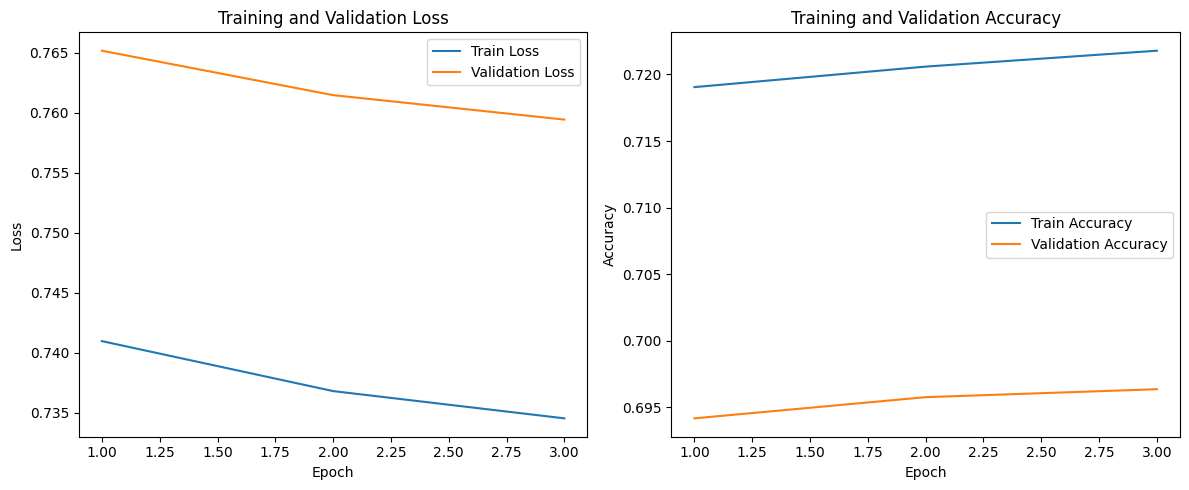

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt


# Lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Number of epochs
n_epochs = 3

for epoch in range(n_epochs):
    # Train the classifier
    nb_classifier.partial_fit(train_inputs, train_labels, classes=np.unique(train_labels))

    # Compute probabilities
    train_probs = nb_classifier.predict_proba(train_inputs)
    val_probs = nb_classifier.predict_proba(val_inputs)

    # Compute loss
    train_loss = log_loss(train_labels, train_probs)
    val_loss = log_loss(val_labels, val_probs)

    # Compute accuracy
    train_preds = nb_classifier.predict(train_inputs)
    val_preds = nb_classifier.predict(val_inputs)
    train_acc = accuracy_score(train_labels, train_preds)
    val_acc = accuracy_score(val_labels, val_preds)

    # Store metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')

# Plotting
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, n_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, n_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, n_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()